# National Park Diversity

## Introduction
The National Park Diversity Project aims to leverage datasets provided by Codecademy to uncover meaningful insights into the flora species within American National Parks. This initiative seeks to understand, analyse, and model biodiversity data to foster greater knowledge of the ecosystem dynamics within these parks.

## Data Analytic Questions
1. What are the most commonly observed plants species across different national parks?
2. How does species oberversation density vary across national parks?
3. Given a randomly selected sample, what is the probability that the species is classified by a conservation status of concern?
4. Does the number of plant species observations significantly differ between parks located in different states?

## Project Structure
To achieve this insight, this project is structured around the following core components:

#### Data Collection
- **Gather Data From Sources**
    - CSV Files: provided by https://www.codecademy.com
    - APIs https://www.nps.gov/
- **Validate the Data**

#### Data Preparation
- **Handle Missing Values**  
   - Identify and either impute or removal values for any missing data points in each DataFrame. 
- **Resolve Inconsistencies**  
   - Standardise naming conventions and formats across datasets.  
   - Verify data accuracy by cross-referencing observations with expected values.  
- **Detect & Remove Duplicates**  
   - Check and remove any duplicate entries in each DataFrame.
- **Merge DataFrames**  
   - Integrate datasets using common keys to enable deeper analytics.  
   - Ensure proper joins (e.g., inner, left, or outer join) based on analytical requirements.  
- **Standardise Formats**  
   - Convert data types to their appropriate formats (e.g., numerical, categorical).  
   - Ensure consistency in column structures across all merged data sources.  

#### Exploratory Data Analysis
- **Summary Statistics**
    - Calculate the total number of observations per species category across each park with an endangered 
    - Identify most observed and least observed species
- **Central Tedency Statistics**
    - Compute the mean number of observations per species across parks.
    - Find the median (middle observation count) to check how plant observations are distributed
    - Identify the mode (most frequent species) to understand which plants appear repeatedly
- **Spread Statistics**
    - Compute the standard deviation to measure the variation in plant species observations across parks
    - Analyze interquartile range (IQR) to determine how observations are spread
    - Identify outliers (species with extremely high or low observation counts) that may indicate local biodiversity hotspots or rare occurrences

#### Probability and Statistical Analysis
- **Probability Mass Functions (PMF)**
    - The PMF will help determine the probability of observing a species with an endangered conservation status
- **Cumulative Ditsribution Functions (CDF)**
    - The CDF will assess the probability that an observation falls within or below a particular conservation status
- **Probability Density Functions (PDF)**
    - The PDF can approximate the likelihood of encountering endangered species based on the national park
- **Conditional Probability**
    - Compute P(Endangered | Observed in a specific park) to determine how certain national parks influence conservation risk
- **Poisson Distribution**
    - The Poisson Distriubtion can model species occurence rates

#### Hypothesis Testing
- **One-Sample T Testing**
    - To check if the average number of observations per park is significantly different from a predefined value
- **Binomial Testing**
    - To evaluate if the proportion of endangered/vulnerable species differs significantly between states
- **Linear Regression**
    - To assess the relationship between state and species observation count trends

#### Conclusion
- Answer the data analytic questions using the evidence from this project

## Prequesites
Import all necessary python packages to complete the data analysis

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import json
from collections import Counter
from scipy.stats import poisson, binomtest

## Data Collection
Gather and Assess all necessary datasets for the National Park Divsersity Project

#### **Observations**
Data Source: CSV File

In [397]:
# Load the observations data
observations = pd.read_csv('observations.csv')
# Display the first few rows of the observations data
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [398]:
# Display the columns of the observations data
print("Columns in observations data:")
print(observations.columns.tolist())
print("\n") # Adds a newline for better readability

# Display the shape of the observations data
print("Shape of observations data (rows, columns):")
print(observations.shape)
print("\n")

# Display the data types of the observations data
print("Data types in observations data:")
print(observations.info())


Columns in observations data:
['scientific_name', 'park_name', 'observations']


Shape of observations data (rows, columns):
(23296, 3)


Data types in observations data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


#### **Species**
Data Source: CSV file

In [399]:
# Load the species data
species = pd.read_csv('species_info.csv')
# Display the first few rows of the species data
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [400]:
# Display the columns of the species data
print("Columns in species data:")
print(species.columns.tolist())
print("\n") # Adds a newline for better readability

# Display the shape of the observations data
print("Shape of species data (rows, columns):")
print(species.shape)
print("\n")

# Display the data types of the observations data
print("Data types in species data:")
print(species.info())

Columns in species data:
['category', 'scientific_name', 'common_names', 'conservation_status']


Shape of species data (rows, columns):
(5824, 4)


Data types in species data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


#### **Parks**
Data Source: National Parks Service API

In [401]:
# Create a function that retrieves json data from the url
def retrieve_json_data(url):
    # First, run a GET request to the URL
    response = requests.get(url)
    load = json.loads(response.text)
    # Idenitfy the total number of records
    total_records = load['total']
    # Next, run another GET request to the URL and set the total number of records to the limit
    response = requests.get(f'{url}&limit={total_records}')
    load = json.loads(response.text)
    # Convert the data extract into a pandas DataFrame
    data = pd.DataFrame(load['data'])
    return data

# Retrieve the parks data from the NPS API
parks = retrieve_json_data('https://developer.nps.gov/api/v1/parks?API_KEY=HSGkevQiVm7Zj902xOLeG7wfEB5Sey7QVH4s7iNZ')

# Print the first 5 rows of the parks data to confirm it was loaded correctly
print(parks.head())

                                     id                                 url  \
0  77E0D7F0-1942-494A-ACE2-9004D2BDC59E  https://www.nps.gov/abli/index.htm   
1  6DA17C86-088E-4B4D-B862-7C1BD5CF236B  https://www.nps.gov/acad/index.htm   
2  E4C7784E-66A0-4D44-87D0-3E072F5FEF43  https://www.nps.gov/adam/index.htm   
3  1A47416F-DAA3-4137-9F30-14AF86B4E547  https://www.nps.gov/afam/index.htm   
4  E6E1D22A-7A89-47F8-813C-B611059A8CF9  https://www.nps.gov/afbg/index.htm   

                                            fullName parkCode  \
0  Abraham Lincoln Birthplace National Historical...     abli   
1                               Acadia National Park     acad   
2                     Adams National Historical Park     adam   
3                African American Civil War Memorial     afam   
4            African Burial Ground National Monument     afbg   

                                         description     latitude  \
0  For over a century people from around the worl...   37.5858662

In [402]:
# Display the columns of the parks data
print("Columns in parks data:")
print(parks.columns.tolist())
print("\n") # Adds a newline for better readability

# Display the shape of the observations data
print("Shape of parks data (rows, columns):")
print(parks.shape)
print("\n")

# Display the data types of the observations data
print("Data types in species data:")
print(parks.info())

Columns in parks data:
['id', 'url', 'fullName', 'parkCode', 'description', 'latitude', 'longitude', 'latLong', 'activities', 'topics', 'states', 'contacts', 'entranceFees', 'entrancePasses', 'fees', 'directionsInfo', 'directionsUrl', 'operatingHours', 'addresses', 'images', 'weatherInfo', 'name', 'designation', 'multimedia', 'relevanceScore']


Shape of parks data (rows, columns):
(474, 25)


Data types in species data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              474 non-null    object 
 1   url             474 non-null    object 
 2   fullName        474 non-null    object 
 3   parkCode        474 non-null    object 
 4   description     474 non-null    object 
 5   latitude        474 non-null    object 
 6   longitude       474 non-null    object 
 7   latLong         474 non-null    object 
 8   activities     

## Data Preparation
To ensure data quality and consistency across each DataFrame

#### **Handle Missing Values**

In [403]:
# Identify any missing values in the observations data
missing_values = observations.isnull().sum()
# Display the missing values in the observations data
print("Missing values in observations data:")
print(missing_values[missing_values > 0])
print("\n")

# Identify any missing values in the species data
missing_values_species = species.isnull().sum()
# Display the missing values in the species data
print("Missing values in species data:")
print(missing_values_species[missing_values_species > 0])
print("\n")

# Identify any missing values in the parks data
missing_values_parks = parks.isnull().sum()
# Display the missing values in the parks data
print("Missing values in parks data:")
print(missing_values_parks[missing_values_parks > 0])

# Result: Only the species.conservation_status column has missing values

Missing values in observations data:
Series([], dtype: int64)


Missing values in species data:
conservation_status    5633
dtype: int64


Missing values in parks data:
Series([], dtype: int64)


In [404]:
# Fill the missing values in the species data with 'No Intervention'
species['conservation_status'].fillna('No Concern', inplace=True)
# Display the unique values in the conservation_status column
print("Unique values in conservation_status column:")
print(species['conservation_status'].unique())
print("\n")

Unique values in conservation_status column:
['No Concern' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']




/var/folders/95/3mz5clln32g1ny403z17_gwc0000gn/T/ipykernel_12865/1933960285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species['conservation_status'].fillna('No Concern', inplace=True)


#### **Standardise Naming Conventions and Formats**

In [405]:
# Standardise the common_names and scientific_names in the species data
species['common_names'] = species['common_names'].str.lower()
species['scientific_name'] = species['scientific_name'].str.lower()
# Display the first few rows of the species data after standardisation
print("Species data after standardisation:")
print(species.head())

Species data after standardisation:
  category                scientific_name  \
0   Mammal  clethrionomys gapperi gapperi   
1   Mammal                      bos bison   
2   Mammal                     bos taurus   
3   Mammal                     ovis aries   
4   Mammal                 cervus elaphus   

                                        common_names conservation_status  
0                           gapper's red-backed vole          No Concern  
1                              american bison, bison          No Concern  
2  aurochs, aurochs, domestic cattle (feral), dom...          No Concern  
3  domestic sheep, mouflon, red sheep, sheep (feral)          No Concern  
4                                      wapiti or elk          No Concern  


In [406]:
# Standardise the scientific_names and park_name in the observations data
observations['scientific_name'] = observations['scientific_name'].str.lower()
observations['park_name'] = observations['park_name'].str.lower()
# Display the first few rows of the observations data after standardisation
print("Observations data after standardisation:")
print(observations.head())

Observations data after standardisation:
            scientific_name                            park_name  observations
0        vicia benghalensis  great smoky mountains national park            68
1            neovison vison  great smoky mountains national park            77
2         prunus subcordata               yosemite national park           138
3      abutilon theophrasti                  bryce national park            84
4  githopsis specularioides  great smoky mountains national park            85


In [407]:
# Standardise the park_name in the parks data
parks['fullName'] = parks['fullName'].str.lower()
# Display the first few rows of the parks data after standardisation
print("Parks data after standardisation:")
print(parks.head())

Parks data after standardisation:
                                     id                                 url  \
0  77E0D7F0-1942-494A-ACE2-9004D2BDC59E  https://www.nps.gov/abli/index.htm   
1  6DA17C86-088E-4B4D-B862-7C1BD5CF236B  https://www.nps.gov/acad/index.htm   
2  E4C7784E-66A0-4D44-87D0-3E072F5FEF43  https://www.nps.gov/adam/index.htm   
3  1A47416F-DAA3-4137-9F30-14AF86B4E547  https://www.nps.gov/afam/index.htm   
4  E6E1D22A-7A89-47F8-813C-B611059A8CF9  https://www.nps.gov/afbg/index.htm   

                                            fullName parkCode  \
0  abraham lincoln birthplace national historical...     abli   
1                               acadia national park     acad   
2                     adams national historical park     adam   
3                african american civil war memorial     afam   
4            african burial ground national monument     afbg   

                                         description     latitude  \
0  For over a century people fr

#### **Cross-Referencing Expected Values**

In [408]:
# Find any scientific names from the observations data that are not in the species data
missing_species = observations[~observations['scientific_name'].isin(species['scientific_name'])]
# Display the missing species
print("Missing species in observations data:")
print(missing_species['scientific_name'].unique())
print("\n")
# Result: All scientific names in the observations data are in the species data

# Find any park names from the observations data that are not in the parks data
missing_parks = observations[~observations['park_name'].isin(parks['fullName'])]
# Display the missing parks
print("Missing parks in observations data:")
print(missing_parks['park_name'].unique())
print("\n")
# Result: 'bryce national park' is not in the parks data because the corresponding name is 'bryce canyon national park'

# Change the park in the parks data to 'bryce national park'
parks['fullName'] = parks['fullName'].replace('bryce canyon national park', 'bryce national park')
updated_missing_parks = observations[~observations['park_name'].isin(parks['fullName'])]


Missing species in observations data:
[]


Missing parks in observations data:
['bryce national park']




#### **Detect Duplicates**

In [409]:
# Detect any duplicates in the observations data
duplicates = observations[observations.duplicated()]
# Apply a sort on the duplicates
duplicates = duplicates.sort_values(by=['scientific_name', 'park_name'])
# Display the duplicates
print("Duplicates in observations data:")
print(duplicates)
print("\n")
# Result: There are duplicates appearing in the observations data, they will need to be removed

# Detect any duplicates in the species data
duplicates_species = species[species.duplicated()]
# Display the duplicates
print("Duplicates in species data:")
print(duplicates_species)
print("\n")
# Result: There are no duplicates in the species data

# Keep only the listed columns
parks = parks[['fullName', 'latitude', 'longitude', 'states']]
# Detect any duplicates in the parks data
duplicates_parks = parks[parks.duplicated()]
# Display the duplicates
print("Duplicates in parks data:")
print(duplicates_parks)
print("\n")


Duplicates in observations data:
              scientific_name                            park_name  \
10674           arctium minus               yosemite national park   
20294  botrychium virginianum            yellowstone national park   
19392       cichorium intybus            yellowstone national park   
7263   echinochloa crus-galli  great smoky mountains national park   
12381    eleocharis palustris  great smoky mountains national park   
13372     hesperis matronalis                  bryce national park   
20820    monotropa hypopithys  great smoky mountains national park   
10038          plantago major  great smoky mountains national park   
18141           poa compressa  great smoky mountains national park   
17378    potentilla norvegica               yosemite national park   
16741       prunella vulgaris  great smoky mountains national park   
22698            salix exigua               yosemite national park   
17577      spilogale putorius            yellowstone nati

In [410]:
# Observations data is only dataframe with duplicates
# Remove duplicates from the observations data
observations = observations.drop_duplicates()
# Display the shape of the observations data after removing duplicates
print("Shape of observations data after removing duplicates (rows, columns):")
print(observations.shape)
print("\n")

Shape of observations data after removing duplicates (rows, columns):
(23281, 3)




#### **Merge DataFrames**

In [411]:
# The first merge will be between the observations and parks dataframes
# Merge the observations and parks dataframes
observations_parks = pd.merge(observations, parks, left_on='park_name', right_on='fullName')
# Drop the fullName column from the merged dataframe
observations_parks = observations_parks.drop(columns=['fullName'])
# Display the first few rows of the merged dataframe
print("Merged observations and parks data:")
print(observations_parks.head())
print("\n")

# Check to see if there are any missing values in the merged dataframe
missing_values_merged = observations_parks.isnull().sum()
# Display the missing values in the merged dataframe
print("Missing values in merged observations and parks data:")
print(missing_values_merged[missing_values_merged > 0])
print("\n")

Merged observations and parks data:
            scientific_name                            park_name  \
0        vicia benghalensis  great smoky mountains national park   
1            neovison vison  great smoky mountains national park   
2         prunus subcordata               yosemite national park   
3      abutilon theophrasti                  bryce national park   
4  githopsis specularioides  great smoky mountains national park   

   observations     latitude     longitude states  
0            68  35.60116374  -83.50818326  NC,TN  
1            77  35.60116374  -83.50818326  NC,TN  
2           138  37.84883288  -119.5571873     CA  
3            84  37.58399144  -112.1826689     UT  
4            85  35.60116374  -83.50818326  NC,TN  


Missing values in merged observations and parks data:
Series([], dtype: int64)




In [412]:
# The second merge will be between the merged observations_parks and a subset of species dataframe (specifically plants)
# Create a subset of the species dataframe where the category is equal to 'Vascular Plant' or 'Nonvascular Plants'
plants = species[(species['category'] == 'Vascular Plant') | (species['category'] == 'Nonvascular Plant')]
# Display the first few rows of the plants dataframe
print("Plant's category distinct values:")
print(plants['category'].unique())
print("\n")

# Merge the observations_parks and plants dataframes
observations_parks_plants = pd.merge(observations_parks, plants, left_on='scientific_name', right_on='scientific_name')
# Display the first few rows of the merged dataframe
print("Merged observations_parks and plants data:")
print(observations_parks_plants.head())

Plant's category distinct values:
['Vascular Plant' 'Nonvascular Plant']


Merged observations_parks and plants data:
                     scientific_name                            park_name  \
0                 vicia benghalensis  great smoky mountains national park   
1                  prunus subcordata               yosemite national park   
2               abutilon theophrasti                  bryce national park   
3           githopsis specularioides  great smoky mountains national park   
4  elymus virginicus var. virginicus               yosemite national park   

   observations     latitude     longitude states        category  \
0            68  35.60116374  -83.50818326  NC,TN  Vascular Plant   
1           138  37.84883288  -119.5571873     CA  Vascular Plant   
2            84  37.58399144  -112.1826689     UT  Vascular Plant   
3            85  35.60116374  -83.50818326  NC,TN  Vascular Plant   
4           112  37.84883288  -119.5571873     CA  Vascular Plant   

    

#### **Standardise Formats**

In [413]:
# Ensure that each column are assigned to the correct data type for all merged dataframes
# Display the columns of the observations_parks_plants dataframe
print("Columns in merged observations_parks and plants data:")
print(observations_parks_plants.info())
print("\n") # Adds a newline for better readability

# Display the shape of the merged dataframe

Columns in merged observations_parks and plants data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20866 entries, 0 to 20865
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      20866 non-null  object
 1   park_name            20866 non-null  object
 2   observations         20866 non-null  int64 
 3   latitude             20866 non-null  object
 4   longitude            20866 non-null  object
 5   states               20866 non-null  object
 6   category             20866 non-null  object
 7   common_names         20866 non-null  object
 8   conservation_status  20866 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB
None




In [414]:
# Create 'common_category' to classify the species based on the last word in the common_names
# Extract the last word in the common_names column after a space or '-'
observations_parks_plants["common_category"] = observations_parks_plants["common_names"].str.split(r"[ -]").str[-1]
# Display a list of the unique values in the common_category column
print("Unique values in common_category column:")
print(pd.Series(observations_parks_plants["common_category"].unique()).head(30))
print("\n") # Adds a newline for better readability


Unique values in common_category column:
0              vetch
1               plum
2         velvetleaf
3            bluecup
4            wildrye
5                rye
6        loosestrife
7               moss
8     primrosewillow
9       bristlegrass
10         rockcress
11        moneyplant
12           honesty
13               oak
14         deergrass
15         raspberry
16           leafcup
17           thistle
18         waterweed
19        alexanders
20          amaranth
21           pigweed
22          geranium
23           bulrush
24         woolgrass
25            violet
26        mannagrass
27         speedwell
28            fescue
29              rose
dtype: object




## Exploratory Data Analysis

Understand and summarise the characateristics of each dataset for further analysis

#### **Summary Statistics**

<Figure size 1000x600 with 0 Axes>

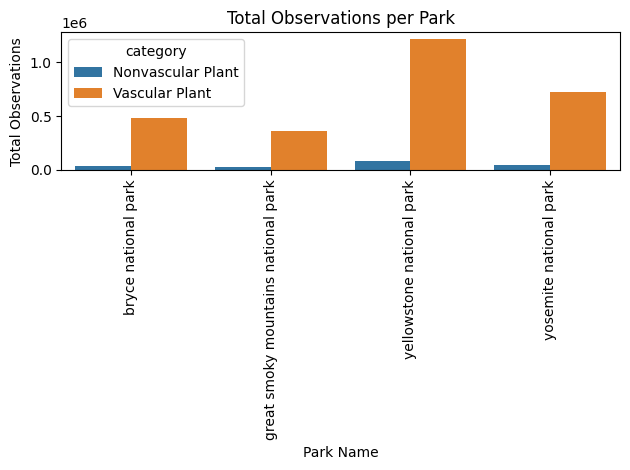

<Figure size 640x480 with 0 Axes>

In [415]:
# Calculate the total number of observations for each category per park
total_observations_park_category = observations_parks_plants.groupby(['park_name','category'])['observations'].sum().reset_index()
# Display the total_observations in a bar chart
plt.figure(figsize=(10, 6))
ax = plt.subplots()
# Create a bar plot for the park_name and observations
sns.barplot(x='park_name', y='observations', hue='category', data=total_observations_park_category)
# Set the title and labels for the plot
plt.xticks(rotation=90)
plt.title('Total Observations per Park')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure
# The bar chart show that the most observations are in the 'Vascular Plant' category
# Also, the yellowstone national park has the most observations


In [416]:
# Identify the most observed and least observed species in the observations_parks_plants data
# Group the observations data by common_category and count the number of observations
most_observed_species = observations_parks_plants.groupby(['common_category'])['observations'].sum().reset_index()
# Sort the most observed species in descending order
most_observed_species = most_observed_species.sort_values(by='observations', ascending=False)
# Display the most observed species
print("Most observed species in observations data:")
print(most_observed_species.head(10))
print("\n")

# Display the least observed species
least_observed_species = most_observed_species.sort_values(by='observations', ascending=True)
print("Least observed species in observations data:")
print(least_observed_species.head(10))
print("\n")


Most observed species in observations data:
     common_category  observations
646             moss        163161
895            sedge        136470
425            grass         61554
859             rush         46674
231           clover         31748
41             aster         31614
1100          violet         31118
1148          willow         29340
351             fern         27588
367         fleabane         24292


Least observed species in observations data:
    common_category  observations
11             aloe           455
285       cynanchum           456
36             arum           459
373            foot           464
378         frasera           467
49              bao           471
771      piratebush           474
728    pencilflower           476
921        skypilot           485
898        seepweed           486




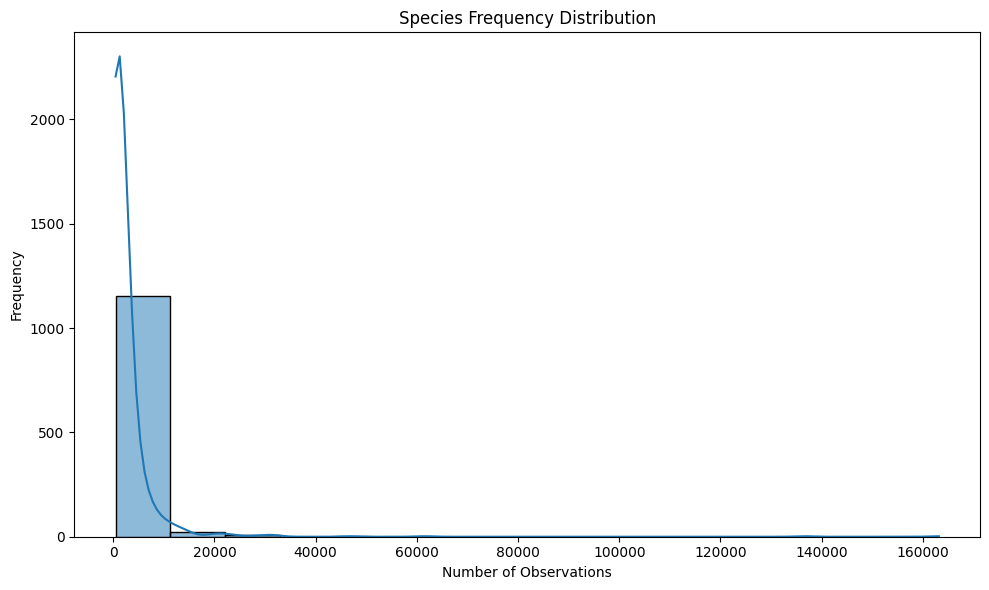

<Figure size 640x480 with 0 Axes>

In [417]:
# Generate a species frequency distribution plot to visualise the most common species
plt.figure(figsize=(10, 6))
# Create a histogram for the most common species
sns.histplot(most_observed_species['observations'], bins=15, kde=True)
# Set the title and labels for the plot
plt.title('Species Frequency Distribution')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

#### **Central Tendency Statistics**
To measure and identify the center or typical value in the dataset

In [418]:
# Identify the mean, median and mode number of observations
mean_observations = observations['observations'].mean()
median_observations = observations['observations'].median()
mode_observations = observations['observations'].mode()[0]
# Display the mean, median and mode number of observations
print("Mean number of observations:")
print(mean_observations)
print("\n")
print("Median number of observations:")
print(median_observations)
print("\n")
print("Mode number of observations:")
print(mode_observations)

Mean number of observations:
142.28035737296509


Median number of observations:
124.0


Mode number of observations:
84


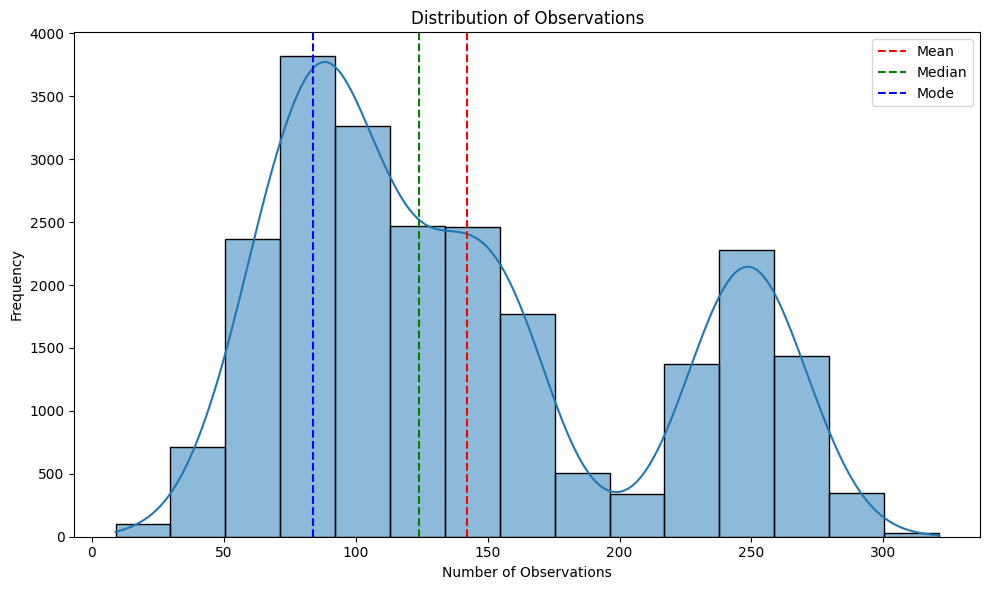

<Figure size 640x480 with 0 Axes>

In [419]:
# Create a histogram to visualise the distribution of observations and outline the mean, median and mode
plt.figure(figsize=(10, 6))
# Create a histogram for the number of observations
sns.histplot(observations['observations'], bins=15, kde=True)
# Set the title and labels for the plot
plt.title('Distribution of Observations')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
# Add vertical lines for the mean, median and mode
plt.axvline(mean_observations, color='red', linestyle='--', label='Mean')
plt.axvline(median_observations, color='green', linestyle='--', label='Median')
plt.axvline(mode_observations, color='blue', linestyle='--', label='Mode')
plt.legend()
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

# Based on the histogram, the distribution of observations is right-skewed
# Mean is greater than the median and the median is greater than the mode

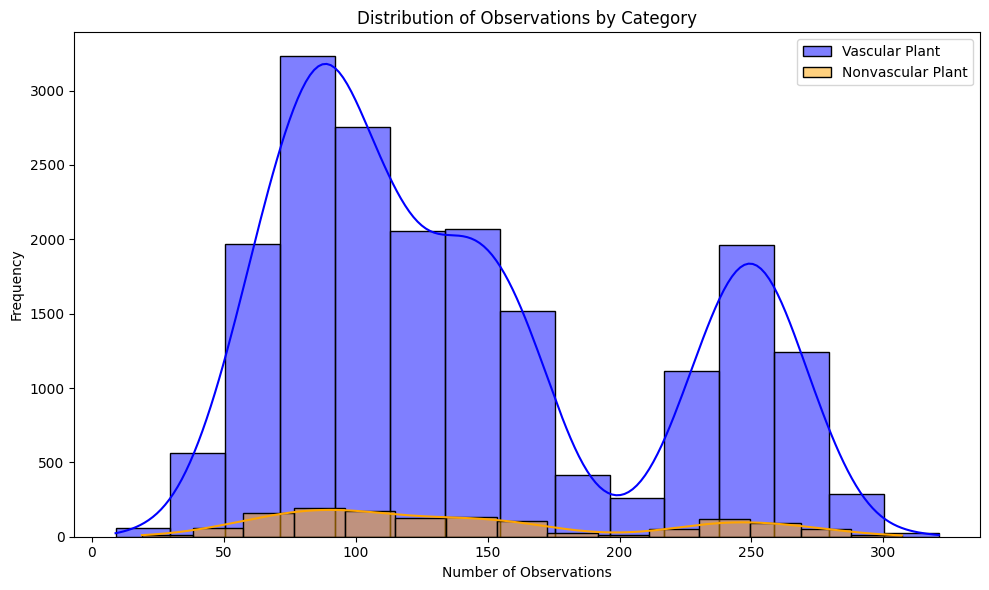

<Figure size 640x480 with 0 Axes>

In [420]:
# Create an overlapping histogram to visualise the distribution of observations for each category
plt.figure(figsize=(10, 6))
# Create a histogram for the Vascular Plant category
sns.histplot(observations_parks_plants[observations_parks_plants['category'] == 'Vascular Plant']['observations'], bins=15, kde=True, color='blue', label='Vascular Plant')
# Create a histogram for the Nonvascular Plant category
sns.histplot(observations_parks_plants[observations_parks_plants['category'] == 'Nonvascular Plant']['observations'], bins=15, kde=True, color='orange', label='Nonvascular Plant')
# Set the title and labels for the plot
plt.title('Distribution of Observations by Category')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

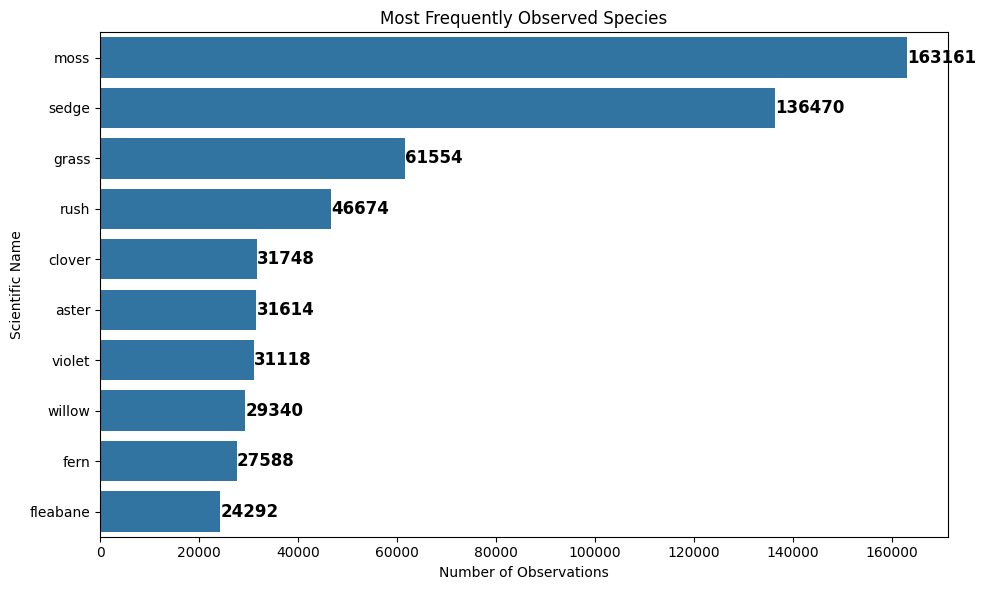

<Figure size 640x480 with 0 Axes>

In [421]:
# Create a bar plot to visualise the 10 most frequently observed species based on common names
plt.figure(figsize=(10, 6))
# Create a bar plot for the most observed species using 'common_category'
ax = sns.barplot(x='observations', y='common_category', data=most_observed_species.head(10))
# Add labels to each bar
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width(),  # X position (bar end)
        bar.get_y() + bar.get_height() / 2,  # Y position (bar center)
        f"{int(bar.get_width())}",  # Label value
        va="center", ha="left", fontsize=12, color="black", weight="bold"
    )
# Set the title and labels for the plot
plt.title('Most Frequently Observed Species')
plt.xlabel('Number of Observations')
plt.ylabel('Scientific Name')
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

#### **Spread Statistics**
Measure the extent of the data to identify data points that differ from the central value

In [422]:
# Calculate the range of the observations by calculating the minimum and maximum number of observations
min_observations = observations['observations'].min()
max_observations = observations['observations'].max()
# Display the range of the observations
print("Range of observations:")
print(max_observations - min_observations)
print("\n")
# Calculate the variance of the observations
variance_observations = observations['observations'].var()
# Display the variance of the observations
print("Variance of observations:")
print(variance_observations)
print("\n")
# Calculate the standard deviation of the observations
std_dev_observations = observations['observations'].std()
# Display the standard deviation of the observations
print("Standard deviation of observations:")
print(std_dev_observations)
print("\n")
# Calculate the coefficient of variation of the observations
cv_observations = std_dev_observations / mean_observations
# Display the coefficient of variation of the observations
print("Coefficient of variation of observations:")
print(cv_observations)
print("\n")
# Referring to the coefficient of variation, the observations data is moderately dispersed

Range of observations:
312


Variance of observations:
4883.974618016609


Standard deviation of observations:
69.88543924178062


Coefficient of variation of observations:
0.49118121806924603




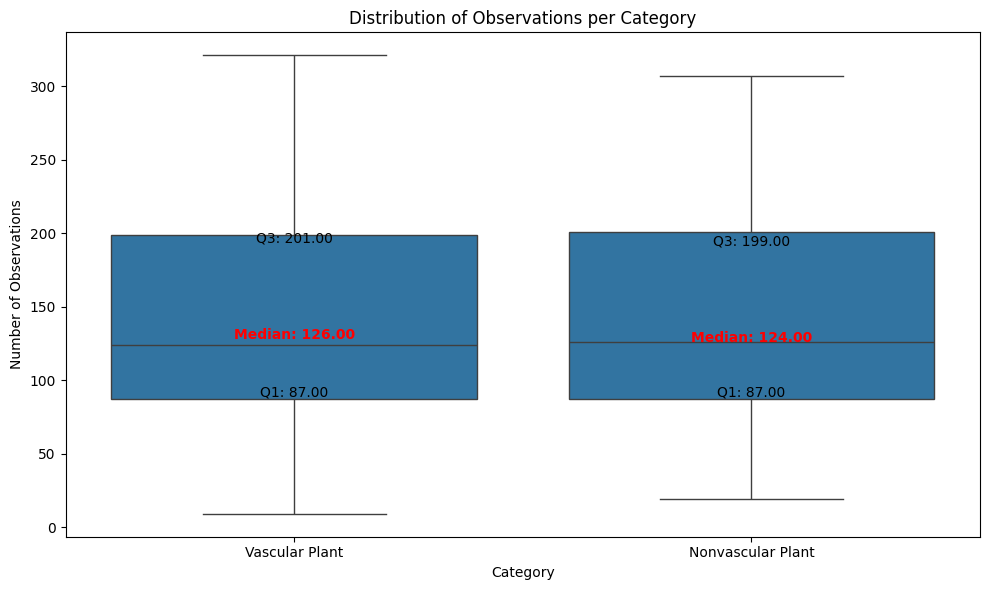

<Figure size 640x480 with 0 Axes>

In [423]:
# Analyse the IQR (Interquartile Range) of the observations data
# Create a side-by-side box plot to visualise the distribution of observations per category
plt.figure(figsize=(10, 6))
# Calulate the statistics of the observations data
stats = observations_parks_plants.groupby('category')['observations'].describe()
# Create a box plot for the observations per category
ax = sns.boxplot(x='category', y='observations', data=observations_parks_plants)
# Add Median and IQR Labels
for i, category in enumerate(stats.index):
    median = stats.loc[category, "50%"]  # Median
    q1 = stats.loc[category, "25%"]  # First quartile (Q1)
    q3 = stats.loc[category, "75%"]  # Third quartile (Q3)
    # Annotate Median
    plt.text(i, median, f"Median: {median:.2f}", ha="center", va="bottom", fontsize=10, color="red", weight="bold")
    # Annotate IQR
    plt.text(i, q1, f"Q1: {q1:.2f}", ha="center", va="bottom", fontsize=10, color="black")
    plt.text(i, q3, f"Q3: {q3:.2f}", ha="center", va="top", fontsize=10, color="black")
# Set the title and labels for the plot
plt.title('Distribution of Observations per Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure
# Based on the side-by-side box plot, it indicates that the distribution the two categories are very similar

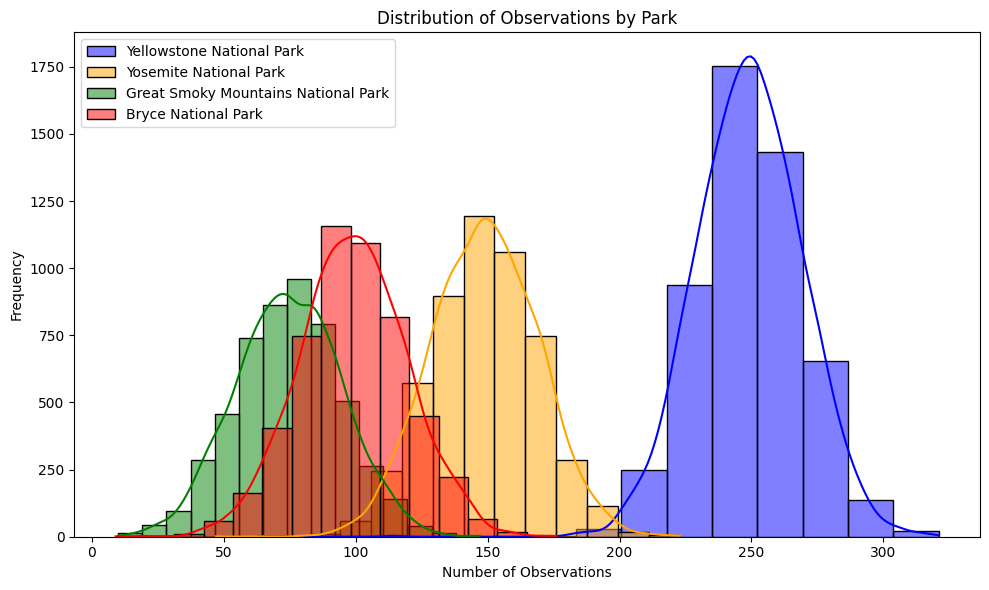

<Figure size 640x480 with 0 Axes>

In [424]:
# Create an overlapping histogram to visualise the distribution of observations for each park
plt.figure(figsize=(10, 6))
# Create a histogram for the yellowstone national park
sns.histplot(observations_parks_plants[observations_parks_plants['park_name'] == 'yellowstone national park']['observations'], bins=15, kde=True, color='blue', label='Yellowstone National Park')
# Create a histogram for the yosemite national park
sns.histplot(observations_parks_plants[observations_parks_plants['park_name'] == 'yosemite national park']['observations'], bins=15, kde=True, color='orange', label='Yosemite National Park')
# Create a histogram for the great smoky mountains national park
sns.histplot(observations_parks_plants[observations_parks_plants['park_name'] == 'great smoky mountains national park']['observations'], bins=15, kde=True, color='green', label='Great Smoky Mountains National Park')
# Create a histogram for the bryce national park
sns.histplot(observations_parks_plants[observations_parks_plants['park_name'] == 'bryce national park']['observations'], bins=15, kde=True, color='red', label='Bryce National Park')
# Set the title and labels for the plot
plt.title('Distribution of Observations by Park')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
# Add a legend to the plot
plt.legend()
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

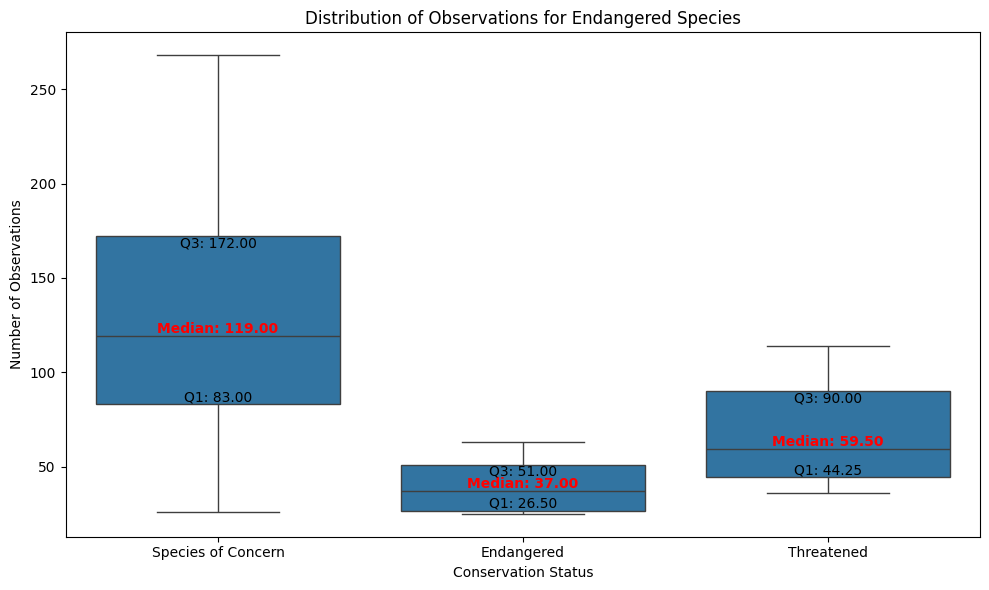

<Figure size 640x480 with 0 Axes>

In [425]:
# Display the distribution of species where the conservation_status is 'Endangered', 'Threatened' or 'Species of Concern'
# Create a subset of the observations data where the conservation_status is 'Endangered', 'Threatened' or 'Species of Concern'
observations_endangered = observations_parks_plants[observations_parks_plants['conservation_status'].isin(['Endangered', 'Threatened', 'Species of Concern'])]
# Create a side-by-side box plot to visualise the distribution of observations for the endangered species
plt.figure(figsize=(10, 6))
# Create a box plot for the observations of endangered species
ax = sns.boxplot(x='conservation_status', y='observations', data=observations_endangered, showfliers=True)
# Add Median and IQR Labels
for i, category in enumerate(observations_endangered['conservation_status'].unique()):
    median = observations_endangered[observations_endangered['conservation_status'] == category]['observations'].median()  # Median
    q1 = observations_endangered[observations_endangered['conservation_status'] == category]['observations'].quantile(0.25)  # First quartile (Q1)
    q3 = observations_endangered[observations_endangered['conservation_status'] == category]['observations'].quantile(0.75)  # Third quartile (Q3)
    # Annotate Median
    plt.text(i, median, f"Median: {median:.2f}", ha="center", va="bottom", fontsize=10, color="red", weight="bold")
    # Annotate IQR
    plt.text(i, q1, f"Q1: {q1:.2f}", ha="center", va="bottom", fontsize=10, color="black")
    plt.text(i, q3, f"Q3: {q3:.2f}", ha="center", va="top", fontsize=10, color="black")
# Set the title and labels for the plot
plt.title('Distribution of Observations for Endangered Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

## Probability and Statistical Analysis


#### **Probability Mass Functions (PMF)**

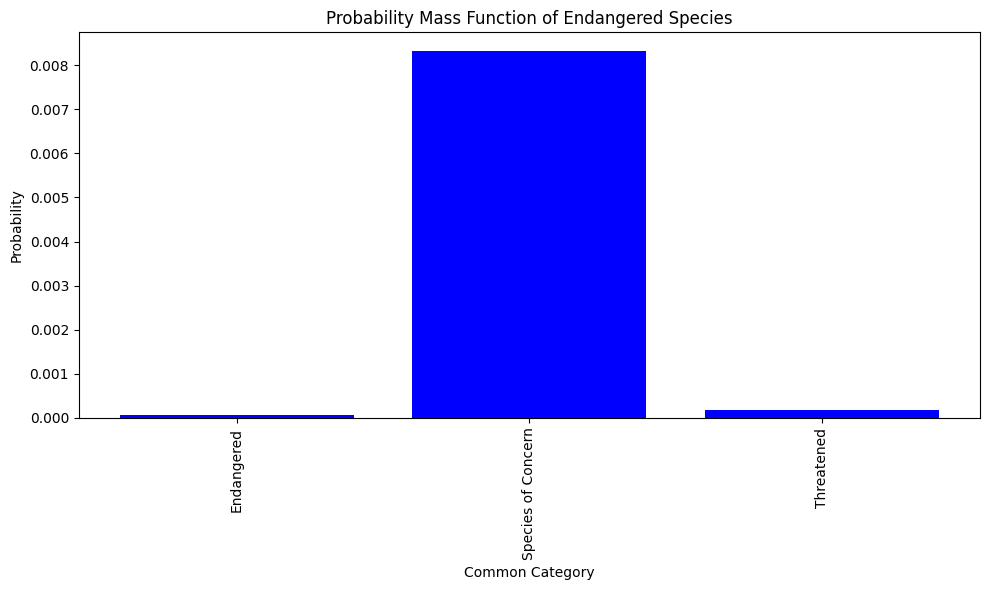

<Figure size 640x480 with 0 Axes>

In [426]:
# Create a Probaility Mass Function (PMF) plot to calculate the probability of observing a species with an endangered status
# Count the number of observations for species with an endangered conservation status 'Endangered', 'Threatened' or 'Species of Concern'
species_counts = observations_endangered.groupby('conservation_status')['observations'].sum().reset_index()
# Calculate the PMF (Probability for each species)
total_observations = observations_parks_plants['observations'].sum()
species_counts["pmf"] = species_counts['observations'] / total_observations
# Create a bar plot for the PMF
plt.figure(figsize=(10, 6))
plt.bar(species_counts['conservation_status'], species_counts['pmf'], color='blue')
# Set the title and labels for the plot
plt.title('Probability Mass Function of Endangered Species')
plt.xlabel('Common Category')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

#### **Cumulative Distribution Functions (CDF)**

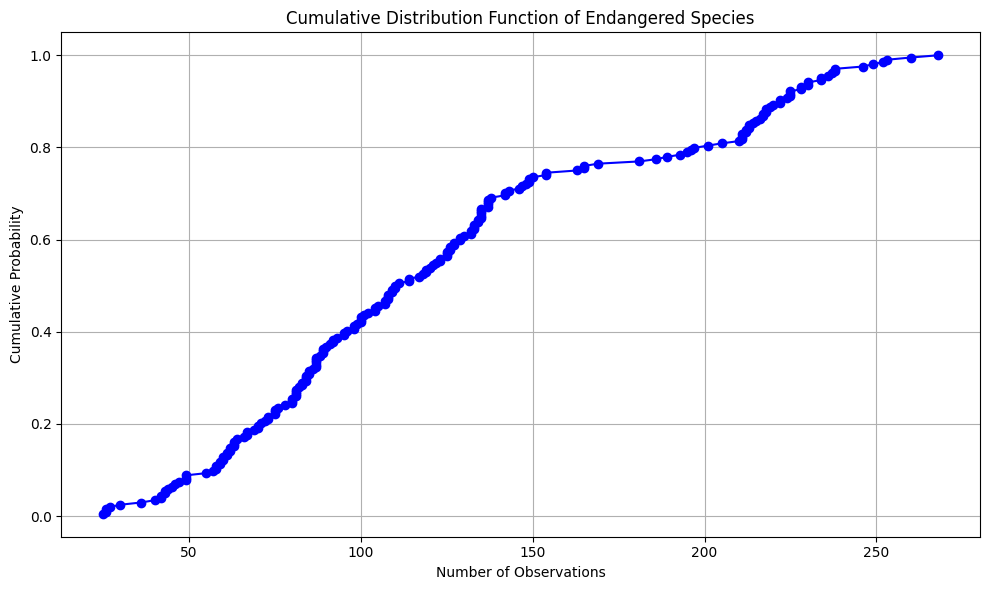

<Figure size 640x480 with 0 Axes>

In [428]:
# Create a cumulative distribution function (CDF) plot to calculate the cumulative probability of observing a species with an endangered status
# Calculate the CDF (Cumulative Probability for each species)
observations_sorted = observations_endangered["observations"].sort_values()

# Compute cumulative probabilities
cumulative_probabilities = np.arange(1, len(observations_sorted) + 1) / len(observations_sorted)
# Create a line plot for the CDF
plt.figure(figsize=(10, 6))
plt.plot(observations_sorted, cumulative_probabilities, marker='o', linestyle='-', color='blue')
# Set the title and labels for the plot
plt.title('Cumulative Distribution Function of Endangered Species')
plt.xlabel('Number of Observations')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

#### **Probability Density Function**

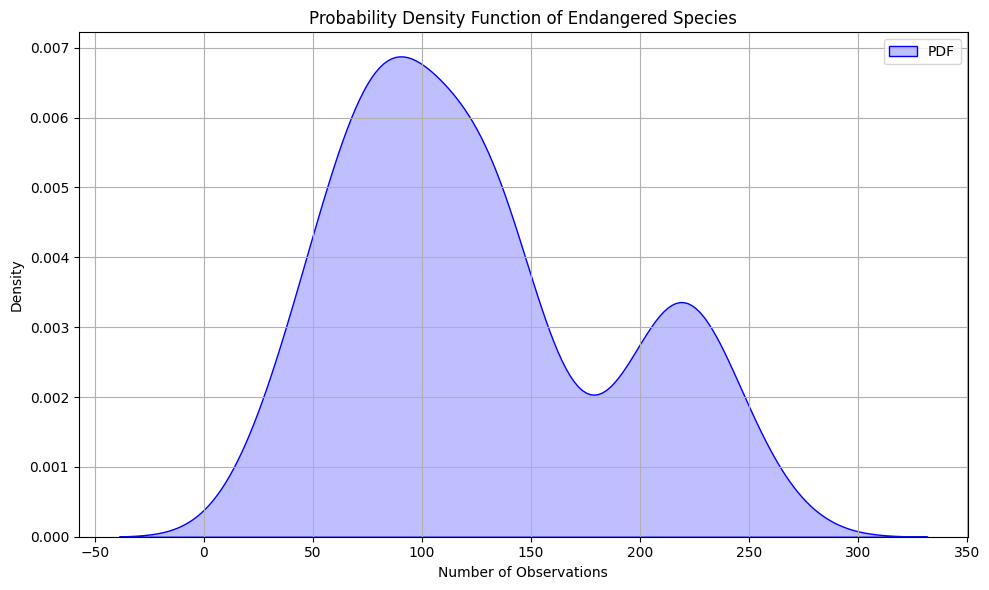

<Figure size 640x480 with 0 Axes>

In [429]:
# Create a Probability Density Function (PDF) plot to calculate the probability density of observing a species with an endangered status
# Create a kernel density estimate (KDE) plot for the PDF
plt.figure(figsize=(10, 6))
# Create a KDE plot for the observations of endangered species
sns.kdeplot(observations_endangered['observations'], color='blue', fill=True, bw_adjust=1, label='PDF')
# Set the title and labels for the plot
plt.title('Probability Density Function of Endangered Species')
plt.xlabel('Number of Observations')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

#### **Conditional Probability**

#### **Poisson Distribution**

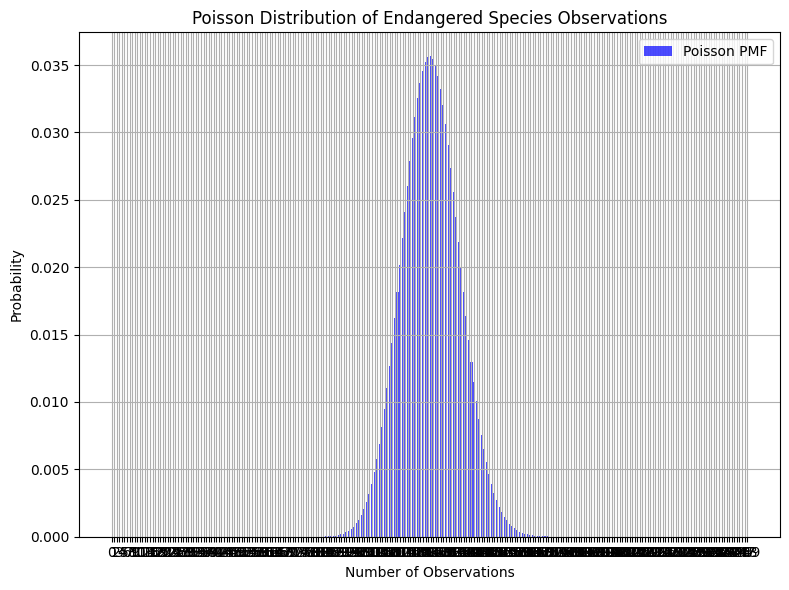

<Figure size 640x480 with 0 Axes>

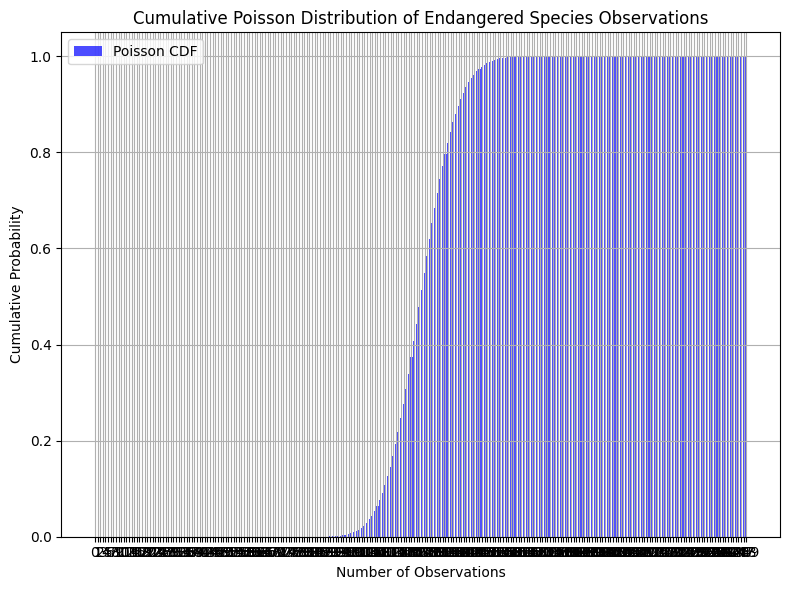

<Figure size 640x480 with 0 Axes>

In [432]:
# Create a Poisson distribution plot to calculate the probability of observing a species with an endangered status
# Define a lambda value to calculate the mean of the observations for the Poisson distribution
lamba_value = observations_endangered['observations'].mean()
# Generate Poisson distribution data
x_values = np.arange(0, int(lamba_value * 2)) # Range of species observatgions
poisson_probs = poisson.pmf(x_values, mu=lamba_value)
# Plot the Poisson distribution
plt.figure(figsize=(8,6))
plt.bar(x_values, poisson_probs, color='blue', alpha=0.7, label='Poisson PMF')
# Set the title and labels for the plot
plt.title('Poisson Distribution of Endangered Species Observations')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(x_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure
print("\n")

# Create a cumulative Poisson distribution plot to calculate the cumulative probability of observing a species with an endangered status
# Generate Poisson distribution data
poisson_cdf = poisson.cdf(x_values, mu=lamba_value)
# Plot the Poisson distribution
plt.figure(figsize=(8,6))
plt.bar(x_values, poisson_cdf, color='blue', alpha=0.7, label='Poisson CDF')
# Set the title and labels for the plot
plt.title('Cumulative Poisson Distribution of Endangered Species Observations')
plt.xlabel('Number of Observations')
plt.ylabel('Cumulative Probability')
plt.xticks(x_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf() # Clear the current figure

## Hypothesis Testing
- **One-Sample T Testing**
    - To check if the average number of observations per park is significantly different from a predefined value
- **Binomial Testing**
    - To evaluate if the proportion of endangered/vulnerable species differs significantly between states
- **Linear Regression**
    - To assess the relationship between state and species observation count trends

#### **One-Sample T Testing**

In [434]:
# Conduct a One-Sample T Test to determine if the mean number of observations is significantly different from a hypothesized value
from scipy import stats
# Set the hypothesized mean value
hypothesized_mean = 100
# Conduct the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(observations['observations'], hypothesized_mean)
# Display the t-statistic and p-value
print("One-Sample T Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print("\n")
# Interpret the results of the t-test
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean number of observations is significantly different from the hypothesized value.")
else:
    print("Fail to reject the null hypothesis: The mean number of observations is not significantly different from the hypothesized value.")
print("\n")

One-Sample T Test Results:
T-statistic: 92.31085336313195
P-value: 0.0


Reject the null hypothesis: The mean number of observations is significantly different from the hypothesized value.




#### **Binomial Testing**

In [438]:
# Conduct a Binomial Test to determine if the proportion of observations in a specific category is significantly different from a hypothesized value
# Set the hypothesized proportion value
hypothesized_proportion = 0.5
# Count the number of observations in the specified category
category_count = observations_parks_plants[observations_parks_plants['category'] == 'Vascular Plant']['observations'].sum()
# Count the total number of observations
total_count = observations_parks_plants['observations'].sum()
# Conduct the binomial test
successes = category_count
failures = total_count - category_count
n = total_count
p_value_binomial = stats.binomtest(successes, n, p=hypothesized_proportion, alternative='two-sided')
# Display the p-value
print("Binomial Test Results:")
print(f"P-value: {p_value_binomial}")
print("\n")


Binomial Test Results:
P-value: BinomTestResult(k=2791714, n=2982367, alternative='two-sided', statistic=0.9360732599307865, pvalue=0.0)




#### **Linear Regression**

In [439]:
# Create a linear regression model to predict the number of observations based on the latitude and longitude of the parks
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Create a new DataFrame with the relevant features
X = observations_parks_plants[['latitude', 'longitude']]
# Create the target variable
y = observations_parks_plants['observations']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Calculate the R-squared value
r_squared = model.score(X_test, y_test)
# Display the R-squared value
print("R-squared value of the linear regression model:")
print(r_squared)
print("\n")

R-squared value of the linear regression model:
0.875384319388852


